In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
kmeans_kwargs = {'init': 'random', 'n_init': 50, 'max_iter': 500, 'random_state': 0}

In [5]:
pipeline = Pipeline([('Preprocess', MinMaxScaler()),
                     ('Clustering', KMeans(n_clusters=10, init='random', n_init=50, max_iter=500, random_state=0))])

pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

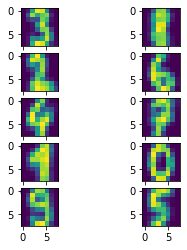

In [7]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
  i.imshow(j)

### Finding the optimal number of clusters

Using SSE

In [8]:
sse = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans = KMeans(n_clusters=k, init='random', n_init=50, max_iter=500, random_state=0)
  kmeans.fit(scaled_digits)
  sse.append(kmeans.inertia_)

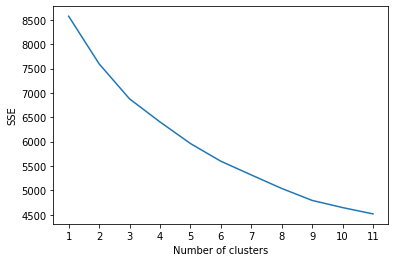

In [9]:
plt.plot(range(1,12), sse)
plt.xticks(range(1,12))
plt.xlabel("Number of clusters")
plt.ylabel('SSE')
plt.show()

There is a slight elbow at k=9, indicating that a few digits could have been merged into a single cluster, thus reducing the total clusters from 10 to 9.

In [10]:
kmeans.labels_

array([ 6,  7, 10, ..., 10,  0, 10], dtype=int32)

Using silhouette scoring

In [11]:
sil_coef = []
scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, init='random', n_init=50, max_iter=500, random_state=0)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef.append(score)

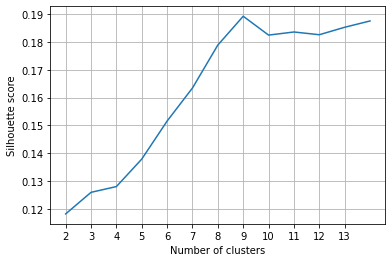

In [12]:
plt.plot(range(2, 15), sil_coef)
plt.xticks(range(2, 14))
plt.xlabel("Number of clusters")
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

There's a clear peak at 9 clusters.